# Random Saving

In [ ]:
encoder_c_optimizer : optim.Adadelta = optim.Adadelta(encoder_c.parameters(), lr= learning_rate)
encoder_a_optimizer : optim.Adadelta = optim.Adadelta(encoder_a.parameters(), lr= learning_rate)
decoder_optimizer :  optim.Adadelta = optim.Adadelta(decoder.parameters(), lr= learning_rate)

data_pairs = train_data

training_pairs = [tensorsFromPair(random.choice(data_pairs)) for i in range(10)]
training_pair = training_pairs[5 - 1]
input_tensor_c, input_tensor_a, target_tensor = training_pair[0], training_pair[1], training_pair[2]

max_length = 15

input_c_tensor, input_a_tensor, target_tensor = input_tensor_c, input_tensor_a, target_tensor

encoder_c_hidden = encoder_c.initHidden()
encoder_a_hidden = encoder_a.initHidden()

# zero grad
encoder_a_optimizer.zero_grad()
encoder_c_optimizer.zero_grad()
decoder_optimizer.zero_grad()

# len of sentence of c, a, t, that already; e.g input_c_length= len(input_c_tensor)
input_c_length = input_c_tensor.size(0)
input_a_length = input_a_tensor.size(0)
target_length = target_tensor.size(0)

encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)
encoder_a_outputs = torch.zeros(max_length, encoder_a.hidden_size, device=device)

loss = 0

for ei in range(input_c_length):
    encoder_c_output, encoder_c_hidden = encoder_c(input_c_tensor[ei], encoder_c_hidden)
    encoder_c_outputs[ei] = encoder_c_output[0, 0]

for ei in range(input_a_length):
    encoder_a_output, encoder_a_hidden = encoder_a(input_a_tensor[ei], encoder_a_hidden)
    encoder_a_outputs[ei] = encoder_a_output[0, 0]

decoder_input = torch.tensor([[SOS_token]], device=device)
decoder_hidden = torch.cat((encoder_c_hidden, encoder_a_hidden), 2)

use_teacher_forcing = True

decoder_output_2 = None


aggregate_outputs = torch.zeros(target_length,OUTPUT_DIM ,device=device)


# target tensor : 1 words, 1x16;
# decoder output : 1 words,

print("target_length is randomized", target_length)

# Teacher forcing: Feed the target as the next input
if use_teacher_forcing:
    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        decoder_output_2 = decoder_output
        aggregate_outputs[di] = decoder_output
        loss += criterion(decoder_output, target_tensor[di])
        decoder_input = target_tensor[di]  # Teacher forcing

# Without teacher forcing: use its own predictions as the next input
else:
    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()  # detach from history as input

        loss += criterion(decoder_output, target_tensor[di])
        if decoder_input.item() == EOS_token:
            break

loss.backward()

encoder_c_optimizer.step()
encoder_a_optimizer.step()
decoder_optimizer.step()


In [ ]:
print(target_length)
print(target_length)

In [ ]:
# criterion = nn.CrossEntropyLoss()
criterion: nn.NLLLoss = nn.NLLLoss()

In [ ]:
aggregate_outputs.size()


In [ ]:
aggregate_outputs

In [1]:
target_tensor

NameError: name 'target_tensor' is not defined

In [ ]:
loss_test = criterion(aggregate_outputs, trg)

In [ ]:
OUTPUT_DIM

In [ ]:
for text in training_pairs:
    target_sentece_1 = text[2]
    print(len(target_sentece_1))

In [ ]:
outputs = torch.zeros(
    target_length,
    OUTPUT_DIM ,
    device=device)
print(decoder_output.size())
decoder_output

In [ ]:
print(target_tensor.size())
target_tensor

# the input for criterion is target_tensor[i] which means = it take the vector of the words target;
# compare with decoder  of len of the vocab size;

In [ ]:
di = 2
target_tensor[di]

In [ ]:
def ngram_maker(list_sentences, min_length, max_length):
    lengths = range(min_length, max_length + 1)
    res_ngram = {length : [] for length in lengths}

    for leng in lengths:
        for sentence in list_sentences:
            n_grams = ngrams(nltk.word_tokenize(sentence), leng)
            for gram in n_grams:
                temp_word = ' '.join(gram)
                res_ngram[leng].append(temp_word)

    return res_ngram

In [ ]:
def get_attribute_markers_test(s, style_src):
    sentence = [s]

    ngrams = get_counts(sentence, d_nonclick_ngrams_counts)
    if len(ngrams) > 0:
        print("before", ngrams)
        ngrams = ngrams[:,1]
        print("after", ngrams)

    pos_counts = get_counts(sentence, d_nonclick_ngrams_counts)

    if len(pos_counts) > 0:
        pos_counts = pos_counts[:,0]
        # print(pos_counts)

    neg_counts = get_counts(sentence, d_clickbait_ngrams_counts)
    if len(neg_counts) > 0:
        neg_counts = neg_counts[:,0]

    return ngrams

ttt = get_attribute_markers_test("bjd_nonclick_ngrams_counts habibie meningggal", 0)

In [ ]:
param_span_t = 3
ngram_stc_only = ngram_from_sentence_v3("bj habibie meninggal", 1, 2)
res = count_ngram_sentence_onlyV3(non_clickbait_ngram_count_v2, ngram_stc_only,1, 2)

In [ ]:
a_elements = importances_t[0][1]
a_original = a
az = array_to_string(a_elements).split()
a_test =  np.isin(az, array_to_string(a_original).split()).any()

In [ ]:
min_length = 1
max_length = 2
ref_bait = "Clickbait"
param_threshold= 1
sentence = "viral ! ini ! itu bj habibie "

smoothing_parameter = 1

sentence_ngram_ref = ngram_from_sentence_v3(ori_sentence=sentence, min_length=min_length, max_length=max_length)

# count the clickbait sentence, clickbait ngram count as based reference
counts_sentence_clickbait = count_ngram_sentence_onlyV3(clickbait_ngram_count_v2,sentence_ngram_ref,min_length,max_length)

# count the non-clickbait sentence, non-clickbait ngram count as based reference
counts_sentence_nonclickbait = count_ngram_sentence_onlyV3(non_clickbait_ngram_count_v2,sentence_ngram_ref,min_length,max_length)

importances = 0

csn_int = counts_sentence_nonclickbait[:,1]
csn_ngram = counts_sentence_nonclickbait[:,0]

csc_int = counts_sentence_clickbait[:,1]
csc_ngram = counts_sentence_clickbait[:,0]

if ref_bait == "Clickbait":
    top = (csc_int + smoothing_parameter)
    bottom = (csn_int + smoothing_parameter)
    importances = (top/bottom)
elif ref_bait == "NotClickbait":
    top = (csn_int+ smoothing_parameter)
    bottom = (csc_int + smoothing_parameter)
    importances = (top/bottom)

# print(sentence_ngram_ref)

de = counts_sentence_clickbait[:, 0]
importances_t = np.vstack((importances, de)).T

def array_to_string(a):
    return ' '.join(flatten(a))

def is_in_string_array_v2(elements, original): #deprecated, does not take into account sequence order
    return np.isin(array_to_string(elements).split(), array_to_string(original).split()).any()

a = []
for importance in importances_t:
    if importance[0] > param_threshold and not is_in_string_array_v2(importance[1], a):
        a.append(' '.join(importance[1]))

In [ ]:
def is_in_string_array(elements, original): #deprecated, does not take into account sequence order

    print("element: ", elements)
    print("original reference list: ", original)

    atse = array_to_string(elements)
    atses = atse.split()

    print('atse :  ', atse)
    print('atses : ', atses)

    atsos = array_to_string(original).split()

    return np.isin(atses, atsos ).any()
# no usage in the func

a = []
for importance in importances_t:
    print("new element =====")
    if importance[0] > param_threshold and not is_in_string_array_v2(importance[1], a):

        print(" insert to a, not in the string array : ", importance[1])
        a.append(' '.join(importance[1]))
    else:
        print("nah no input to a")
        print("==============")

In [ ]:
# get ngram from the word in the sentence reference only
def ngram_from_sentence_v3(ori_sentence, min_length, max_length):
    sent_in_arr = [ori_sentence]
    lengths = range(min_length, max_length + 1)
    res_ngram_sentence = []

    for leng in lengths:
        for sentence in sent_in_arr:
            n_grams = ngrams(nltk.word_tokenize(sentence), leng)
            for grams in n_grams:
                res = ' '.join(grams)
                if res not in res_ngram_sentence:
                    res_ngram_sentence.append(res)

            sentence_split = sentence.split()
            n_grams_split = nltk.ngrams(sentence_split, leng)

            for grams in n_grams_split:
                res = ' '.join(grams)
                if res not in res_ngram_sentence:
                    res_ngram_sentence.append(res)

    return res_ngram_sentence

# get  counter based on the sentence and compare to the ngram dictionary
def count_ngram_sentence_only(ngram_dictionary, ngram_from_sentence, min_length, max_length):
    lengths = range(min_length, max_length + 1)

    ngram_compare_dict = {}
    ngram_compare_arr = []

    for key in lengths:
        for split in ngram_from_sentence:
            # print(split)
            for ngram_list in ngram_dictionary[key].items():
                word_freq = ngram_list[0]
                if split == word_freq:
                    if split in ngram_compare_dict:
                        ngram_compare_dict[split] = max(ngram_compare_dict[split], ngram_dictionary[key][split])
                    ngram_compare_dict[split] = ngram_dictionary[key][split]
                elif split not in ngram_compare_dict:
                    ngram_compare_dict[split] = 0

    for key, val in ngram_compare_dict.items():
        ngram_compare_arr.append([key, val])

    return np.array(ngram_compare_arr)

In [ ]:
#Parameters:
param_smooth = 1
param_threshold = 5
param_span = 4

param_backoff_limit = 3

#ngram has punctuation
def has_punctuation(ngram): #damn I'm very proud of making this from scratch lol, looks elegant in one line
    return True in [x in string.punctuation for x in ngram]

# generate ngram from all of the sentence
def generate_ngrams(lines,  min_length: int =1, max_length=param_span) -> dict :
    #     lines = placeholder + lines
    lengths: range  = range(min_length, max_length + 1)
    ngrams: dict  = {length: [] for length in lengths}
    queue: collections.deque = collections.deque(maxlen=max_length)

    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length and not has_punctuation(current[:length]):
                ngrams[length].append(current[:length])

    short_by = 0
    for line in lines:
        short_by = max(0, max_length - len(lines))
        for word in line.split():
            queue.append(word)
            if len(queue) >= max_length-short_by:
                add_queue()

    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

#modified from & fixed their error of ngram with # of words < 4: https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52
def count_ngrams(lines, min_length: int =1, max_length=param_span ) -> dict:
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length and not has_punctuation(current[:length]):
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    short_by = 0
    for line in lines:
        short_by = max(0, max_length - len(lines))
        for word in line.split():
            queue.append(word)
            if len(queue) >= max_length - short_by:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams

#Example of usage: count ngram of the list of sentence
d_nonclick_ngrams_counts = count_ngrams(nonclickbait_l_c)
d_clickbait_ngrams_counts = count_ngrams(clickbait_l_c)

# PRE

In [ ]:
# testing example
stc_rand: [] = random.choice(pairs)
print("content : {} \nattribute: {} \ntgt: {} ".format(stc_rand[0], stc_rand[1], stc_rand[2]))

training_pairs = [tensorsFromPair(stc_rand) for i in range(10)]
# print(len(training_pairs))

iter = 8
training_pair = training_pairs[iter - 1]
input_tensor_c = training_pair[0]
# input_tensor_a = training_pair[1]
# target_tensor = training_pair[2]


# print(len(input_tensor_c))
# print(input_tensor_c)

# input_c_length = input_tensor_c.size(0)

# print(input_c_length)

# prev size
word_vec_size = 128
hidden_size = 512

# word_size map of the input and the output of the words
INPUT_DIM = input_lang.n_words
OUTPUT_DIM = output_lang.n_words

# dimension_size of embedding layers
ENC_EMB_DIM = 128
DEC_EMB_DIM = 128

# hidden_size of the dimension that connect between input, hidden,output
HID_DIM = 512
NN_LAYERS = 2


# implementation in encoder both A and C
encoder_c = EncoderRNN(INPUT_DIM, ENC_EMB_DIM, HID_DIM).to(device)
encoder_a = EncoderRNN(INPUT_DIM, DEC_EMB_DIM, HID_DIM).to(device)

# decoder
decoder = DecoderRNN(HID_DIM + HID_DIM, word_vec_size, OUTPUT_DIM).to(device)

max_length = 50

encoder_c_outputs = torch.zeros(max_length, encoder_c.hidden_size, device=device)



In [3]:
import numpy as np
import pandas as pd

In [4]:
(lambda x: x*2)(12)

24

In [5]:
list_1 = [1,2,3,4,5,6,7,8,9]
filter(lambda x: x%2==0, list_1)

In [6]:
list(filter(lambda x: x%2==0, list_1))

[2, 4, 6, 8]

In [7]:
list_1 = [1,2,3,4,5,6,7,8,9]
cubed = map(lambda x: pow(x,3), list_1)
list(cubed)

[1, 8, 27, 64, 125, 216, 343, 512, 729]

In [8]:
df = pd.DataFrame({
    'Name': ['Luke','Gina','Sam','Emma'],
    'Status': ['Father', 'Mother', 'Son', 'Daughter'],
    'Birthyear': [1976, 1984, 2013, 2016],
})

df.head()

,Name,Status,Birthyear
0,Luke,Father,1976
1,Gina,Mother,1984
2,Sam,Son,2013
3,Emma,Daughter,2016


In [9]:
df['age'] = df['Birthyear'].apply(lambda x: 2021-x)

In [10]:
df.age.head

<bound method NDFrame.head of 0    45
1    37
2     8
3     5
Name: age, dtype: int64>

In [11]:
# list(filter(lambda x: x>18, df['age']))
list(filter(lambda x: x> 18, df.age))

[45, 37]

In [12]:
df['double_age'] = df['age'].map(lambda x: x*2)

In [13]:
df['Gender'] = df['Status'].map(lambda x: 'Male' if x=='Father' or x=='son' else 'Female')

In [14]:
df.head()

,Name,Status,Birthyear,age,double_age,Gender
0,Luke,Father,1976,45,90,Male
1,Gina,Mother,1984,37,74,Female
2,Sam,Son,2013,8,16,Female
3,Emma,Daughter,2016,5,10,Female


In [15]:
import re

def putSpace(input):

    # regex [A-Z][a-z]* means any string starting
    # with capital character followed by many
    # lowercase letters
    words = re.findall('[A-Z][a-z]*', input)

    print(words)

    # Change first letter of each word into lower
    # case
    for i in range(0,len(words)):
        words[i]=words[i][0].lower()+words[i][1:]

    print(words)
    print(' '.join(words))

# Driver program
if __name__ == "__main__":
    input = 'BruceWayneIsBatman'
    putSpace(input)

['Bruce', 'Wayne', 'Is', 'Batman']
['bruce', 'wayne', 'is', 'batman']
bruce wayne is batman


In [16]:
text_try = "digrebeg di hotel, aktor ftv ridho illahi berduaan dengan selebgram chagii wow! amelia?"

In [17]:
df['Status'] = df['Status'].replace({'.':' . ',', ':' , ', '!': " ! ", "?": " ? "},regex=True)


KeyboardInterrupt



In [ ]:
text_try = text_try.replace(".", " . " )

res_text = text_try.replace(",", " , " )

# res_text = text_try.replace({'.':' . ',', ':' , ', '!': " ! ", "?": " ? "}, )

print(res_text)

In [ ]:
rule = "([\D])([^\w^\s])([\s$\D])?"

text = "sering quality time bersama keluarga? ternyata ini 3,000 man,3 seperti manfaatnya!"

clean = re.compile(rule)
output = re.sub(clean, '\1 \2 \3' , text)

print(output)
# res = text.apply(lambda y: " ".join((re.sub(r'([!/?/./,/%/\'/\"/-/:])', lambda x: ' ' + x.group()+' ' , y)).split()) , 1)

# Chapter 16 – Natural Language Processing with RNNs and Attention

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
# !conda install -c conda-forge tensorflow -y

In [3]:
import tensorflow as tf

assert tf.__version__ >= "2.8.0"

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# !conda remove tensorflow -y

In [5]:
!pip3 install tensorflow

In [6]:
# !pip3 install --upgrade tensorflow==2.8

In [7]:
import tensorflow as tf

assert tf.__version__ >= "2.8.0"

In [8]:
# !python -m pip show tensorflow

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [10]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "nlp"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [11]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")

No GPU was detected. Neural nets can be very slow without a GPU.


In [12]:
# import tensorflow as tf
#
# assert tf.__version__ >= "2.8.0"

In [13]:
import tensorflow as tf

shakespeare_url = "https://homl.info/shakespeare"  # shortcut URL
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

In [14]:
# extra code – shows a short text sample
print(shakespeare_text[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


In [15]:
# extra code – shows all 39 distinct characters (after converting to lower case)
"".join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

In [16]:
# text_vec_layer = tf.keras.layers.TextVectorization(split="character",
#                                                    standardize="lower")
# text_vec_layer.adapt([shakespeare_text])
# encoded = text_vec_layer([shakespeare_text])[0]

In [17]:
# !pip3 uninstall tf-nightly -y

In [55]:
import tensorflow as tf

assert tf.__version__ >= "2.8.0"

In [19]:
tf.keras.layers.TextVectorization()

2022-09-09 20:05:42.108456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
text_vec_layer = tf.keras.layers.TextVectorization(split="character",
                                                   standardize="lower")
text_vec_layer.adapt([shakespeare_text])
encoded = text_vec_layer([shakespeare_text])[0]

In [21]:
encoded -= 2  # drop tokens 0 (pad) and 1 (unknown), which we will not use
n_tokens = text_vec_layer.vocabulary_size() - 2  # number of distinct chars = 39
dataset_size = len(encoded)  # total number of chars = 1,115,394

In [22]:
encoded

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19,  5,  8, ..., 20, 26, 10])>

In [23]:
text_vec_layer

In [24]:
n_tokens

39

In [25]:
dataset_size

1115394

In [26]:
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(100_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [27]:
# extra code – a simple example using to_dataset()
# There's just one sample in this dataset: the input represents "to b" and the
# output represents "o be"
list(to_dataset(text_vec_layer(["To be"])[0], length=4))

[(<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[ 4,  5,  2, 23]])>,
  <tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[ 5,  2, 23,  3]])>)]

In [28]:
length = 100
tf.random.set_seed(42)
train_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True,
                       seed=42)
valid_set = to_dataset(encoded[1_000_000:1_060_000], length=length)
test_set = to_dataset(encoded[1_060_000:], length=length)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=16),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    "my_shakespeare_model",
    monitor="val_accuracy",
    save_best_only=True)

history = model.fit(train_set,
                    validation_data=valid_set,
                    epochs=1,
                    callbacks=[model_ckpt])

2022-09-09 20:06:58.077319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 72915 of 100000
2022-09-09 20:07:02.071507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


KeyboardInterrupt: 

# An Encoder–Decoder Network for Neural Machine Translation

In [68]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip"
path = tf.keras.utils.get_file("spa-eng.zip", origin=url, cache_dir="datasets",
                               extract=True)
text = (Path(path).with_name("spa-eng") / "spa.txt").read_text()

In [69]:
import numpy as np

text = text.replace("¡", "").replace("¿", "")
pairs = [line.split("\t") for line in text.splitlines()]
np.random.seed(42)  # extra code – ensures reproducibility on CPU
np.random.shuffle(pairs)
sentences_en, sentences_es = zip(*pairs)  # separates the pairs into 2 lists

In [70]:
pairs

[['How boring!', 'Qué aburrimiento!'],
 ['I love sports.', 'Adoro el deporte.'],
 ['Would you like to swap jobs?',
  'Te gustaría que intercambiemos los trabajos?'],
 ['My mother did nothing but weep.', 'Mi madre no hizo nada sino llorar.'],
 ['Croatia is in the southeastern part of Europe.',
  'Croacia está en el sudeste de Europa.'],
 ['I have never eaten a mango before.', 'Nunca he comido un mango.'],
 ['Tell the taxi driver to drive faster.',
  'Decile al taxista que maneje más rápido.'],
 ['Tom and I work together.', 'Tom y yo trabajamos juntos.'],
 ['I would prefer an honorable death.', 'Preferiría una muerte honorable.'],
 ['Tom married a much younger woman.',
  'Tom se ha casado con una mujer mucho más joven.'],
 ["It couldn't happen to me.", 'A mí no podría pasarme.'],
 ["Tom isn't going to marry you.", 'Tom no se va a casar contigo.'],
 ["Can you believe it? He's even lazier than me.",
  'Puedes creerlo? Él es aún más flojo que yo.'],
 ['She has hundreds of books.', 'Ella tie

In [71]:
for i in range(3):
    print(sentences_en[i], "=>", sentences_es[i])

How boring! => Qué aburrimiento!
I love sports. => Adoro el deporte.
Would you like to swap jobs? => Te gustaría que intercambiemos los trabajos?


In [83]:
vocab_size = 20
max_length = 50
text_vec_layer_en = tf.keras.layers.TextVectorization(
    vocab_size, output_sequence_length=max_length)
text_vec_layer_es = tf.keras.layers.TextVectorization(
    vocab_size, output_sequence_length=max_length)
text_vec_layer_en.adapt(sentences_en)
text_vec_layer_es.adapt([f"startofseq {s} endofseq" for s in sentences_es])

In [ ]:
for i in range(3):
    print(sentences_en[i], "=>", sentences_es[i])

In [80]:
text_vec_layer_en.get_vocabulary()[:3000]

['',
 '[UNK]',
 'the',
 'i',
 'to',
 'you',
 'tom',
 'a',
 'is',
 'he',
 'in',
 'of',
 'that',
 'it',
 'was',
 'do',
 'have',
 'this',
 'me',
 'my',
 'for',
 'she',
 'dont',
 'are',
 'what',
 'his',
 'mary',
 'we',
 'your',
 'on',
 'be',
 'with',
 'want',
 'not',
 'im',
 'and',
 'like',
 'at',
 'know',
 'him']

In [94]:
text_vec_layer_es.get_vocabulary()[:30]

['',
 '[UNK]',
 'startofseq',
 'endofseq',
 'de',
 'que',
 'a',
 'no',
 'tom',
 'la',
 'el',
 'en',
 'es',
 'un',
 'me',
 'se',
 'por',
 'lo',
 'una',
 'su']

In [93]:
X_train = tf.constant(sentences_en[:100_000])
X_valid = tf.constant(sentences_en[100_000:])
X_train_dec = tf.constant([f"startofseq {s}" for s in sentences_es[:100_000]])
X_valid_dec = tf.constant([f"startofseq {s}" for s in sentences_es[100_000:]])
Y_train = text_vec_layer_es([f"{s} endofseq" for s in sentences_es[:100_000]])
Y_valid = text_vec_layer_es([f"{s} endofseq" for s in sentences_es[100_000:]])

In [66]:
encoder_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
decoder_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)

In [85]:
embed_size = 128

encoder_input_ids = text_vec_layer_en(encoder_inputs)
decoder_input_ids = text_vec_layer_es(decoder_inputs)

encoder_embedding_layer = tf.keras.layers.Embedding(vocab_size, embed_size,
                                                    mask_zero=True)
decoder_embedding_layer = tf.keras.layers.Embedding(vocab_size, embed_size,
                                                    mask_zero=True)

encoder_embeddings = encoder_embedding_layer(encoder_input_ids)
decoder_embeddings = decoder_embedding_layer(decoder_input_ids)

# Sentiment Analysis

In [34]:
# !pip3 install -q tfds-nightly tensorflow matplotlib

In [86]:
encoder_input_ids

<KerasTensor: shape=(None, 50) dtype=int64 (created by layer 'text_vectorization_9')>

In [88]:
encoder = tf.keras.layers.LSTM(512, return_state=True)
encoder_outputs, *encoder_state = encoder(encoder_embeddings)


In [89]:
decoder = tf.keras.layers.LSTM(512, return_sequences=True)
decoder_outputs = decoder(decoder_embeddings, initial_state=encoder_state)

In [91]:
output_layer = tf.keras.layers.Dense(vocab_size, activation="softmax")
Y_proba = output_layer(decoder_outputs)

In [95]:
model = tf.keras.Model(inputs=[encoder_inputs, decoder_inputs],
                       outputs=[Y_proba])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit((X_train, X_train_dec), Y_train, epochs=1, validation_data=((X_valid, X_valid_dec), Y_valid))

3125/3125 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.7049WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f83734178b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3125/3125 [==============================] - 1542s 490ms/step - loss: 0.1483 - accuracy: 0.7049 - val_loss: 0.1315 - val_accuracy: 0.7226


In [98]:
# !pwd
model.save('/Users/nurrizkyimani/PycharmProjects/nlp-clickbait-transfers')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('model',), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveable_factory', 'saveables'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('saveables', 'tensor_structure'), but source function had ('saveables',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8351bd3dc0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8351bd3dc0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8351bd3dc0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f8360016f70>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /Users/nurrizkyimani/PycharmProjects/nlp-clickbait-transfers/assets


INFO:tensorflow:Assets written to: /Users/nurrizkyimani/PycharmProjects/nlp-clickbait-transfers/assets


In [154]:
sentence_en = "I like soccer"
translation = ""

word_idx = 1
  # print("print word_idx", word_idx)
X = np.array([sentence_en])  # encoder input
# print(X)

X_dec = np.array(["startofseq " + translation])  # decoder input
# print(X_dec)


# model.predict()
y_proba = model.predict((X, X_dec))[0,10]# last token's probas
# print(y_proba)

y_proba

predicted_word_id = np.argmax(y_proba)
# print(predicted_word_id)

# test = np.argmax(y_proba)

# print(test)


1/1 [==============================] - 0s 48ms/step


array([1.88530139e-05, 5.05020082e-01, 2.03813543e-05, 1.82372372e-04,
       1.02445541e-03, 2.18955814e-04, 1.48296612e-03, 1.05833985e-01,
       1.88816793e-03, 4.29831911e-03, 1.02007168e-03, 2.65815004e-04,
       3.59552703e-03, 2.21436465e-04, 3.56876820e-01, 3.70510714e-03,
       7.22576573e-04, 1.32989828e-02, 1.46520339e-04, 1.58648807e-04],
      dtype=float32)

In [155]:
def translate(sentence_en):
    translation = ""

    # print(max_length)
    for word_idx in range(max_length):

        # print("print word_idx", word_idx)
        X = np.array([sentence_en])  # encoder input
        # print(X)

        X_dec = np.array(["startofseq " + translation])  # decoder input
        # print(X_dec)

        y_proba = model.predict((X, X_dec))[0, word_idx]  # last token's probas
        # print(y_proba)

        predicted_word_id = np.argmax(y_proba)
        print(predicted_word_id)

        # predicted_word = text_vec_layer_es.get_vocabulary()[predicted_word_id]
        # print(predicted_word)

        # if predicted_word == "endofseq":
        #     break
        # translation += " " + predicted_word

    return translation.strip()


translate("I like soccer")

1/1 [==============================] - 0s 90ms/step
[1.88530139e-05 5.05020082e-01 2.03813543e-05 1.82372372e-04
 1.02445541e-03 2.18955814e-04 1.48296612e-03 1.05833985e-01
 1.88816793e-03 4.29831911e-03 1.02007168e-03 2.65815004e-04
 3.59552703e-03 2.21436465e-04 3.56876820e-01 3.70510714e-03
 7.22576573e-04 1.32989828e-02 1.46520339e-04 1.58648807e-04]
1
1/1 [==============================] - 0s 46ms/step
[1.88530139e-05 5.05020082e-01 2.03813543e-05 1.82372372e-04
 1.02445541e-03 2.18955814e-04 1.48296612e-03 1.05833985e-01
 1.88816793e-03 4.29831911e-03 1.02007168e-03 2.65815004e-04
 3.59552703e-03 2.21436465e-04 3.56876820e-01 3.70510714e-03
 7.22576573e-04 1.32989828e-02 1.46520339e-04 1.58648807e-04]
1
1/1 [==============================] - 0s 43ms/step
[1.88530139e-05 5.05020082e-01 2.03813543e-05 1.82372372e-04
 1.02445541e-03 2.18955814e-04 1.48296612e-03 1.05833985e-01
 1.88816793e-03 4.29831911e-03 1.02007168e-03 2.65815004e-04
 3.59552703e-03 2.21436465e-04 3.56876820e-01

''

['startofseq ']
1/1 [==============================] - 0s 41ms/step
['startofseq  [UNK]']
1/1 [==============================] - 0s 60ms/step
['startofseq  [UNK] [UNK]']
1/1 [==============================] - 0s 60ms/step


'[UNK] [UNK]'

# Style Transfer

In [53]:
import tensorflow_datasets as tfds

raw_train_set, raw_valid_set, raw_test_set = tfds.load(
    name="imdb_reviews",
    split=["train[:90%]", "train[90%:]", "test"],
    as_supervised=True
)
tf.random.set_seed(42)
train_set = raw_train_set.shuffle(5000, seed=42).batch(32).prefetch(1)
valid_set = raw_valid_set.batch(32).prefetch(1)
test_set = raw_test_set.batch(32).prefetch(1)

In [36]:
for review, label in raw_train_set.take(4):
    print(review.numpy().decode("utf-8"))
    print("Label:", label.numpy())

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label: 0
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development

2022-09-09 20:15:42.288545: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [37]:
vocab_size = 1000
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
text_vec_layer.adapt(train_set.map(lambda reviews, labels: reviews))

In [38]:
# text_vec_layer.

In [50]:
embed_size = 128
tf.random.set_seed(42)
model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(vocab_size, embed_size),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


In [51]:
inputs = tf.keras.layers.Input(shape=[], dtype=tf.string)
token_ids = text_vec_layer(inputs)
mask = tf.math.not_equal(token_ids, 0)
Z = tf.keras.layers.Embedding(vocab_size, embed_size)(token_ids)
Z = tf.keras.layers.GRU(128, dropout=0.2)(Z, mask=mask)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(Z)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [52]:
text_vec_layer(["Great movie!", "This is DiCaprio's best role."])

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[ 86,  18,   0,   0,   0],
       [ 11,   7,   1, 116, 217]])>

In [84]:
import os
import tensorflow_hub as hub

os.environ["TFHUB_CACHE_DIR"] = "my_tfhub_cache"
model = tf.keras.Sequential([
    hub.KerasLayer(
        "https://tfhub.dev/google/universal-sentence-encoder/4",
        trainable=True,
        dtype=tf.string,
        input_shape=[]),
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.fit(train_set, validation_data=valid_set, epochs=1)

KeyboardInterrupt: 

In [57]:
# !pip install "tensorflow>=2.0.0"
# !pip install --upgrade tensorflow-hub

In [59]:
# !pip install keras

In [61]:
# !pip3 install --force-reinstall tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 MB 1.6 MB/s eta 0:00:0000:0100:03
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.1 MB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-macosx_10_9_x86_64.whl (13.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 2.1 MB/s eta 0:00:0000:0100:01
  Using cached grpcio-1.48.1-cp38-cp38-macosx_10_10_x86_64.whl (4.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 2.3 MB/s eta 0:00:0000:0100:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.23.2-cp38-cp38-mac

# Random Data Analysis

In [3]:
import seaborn as sns

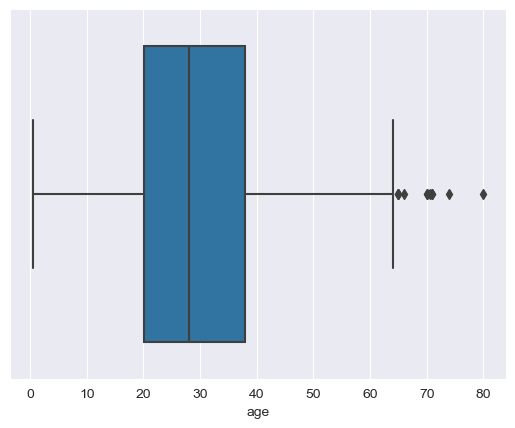

In [4]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df["age"])

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


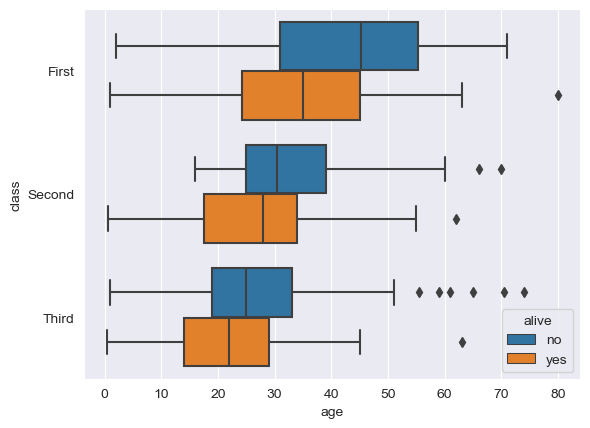

In [6]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

In [2]:
import seaborn as sns
flights = sns.load_dataset("flights")

In [3]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
